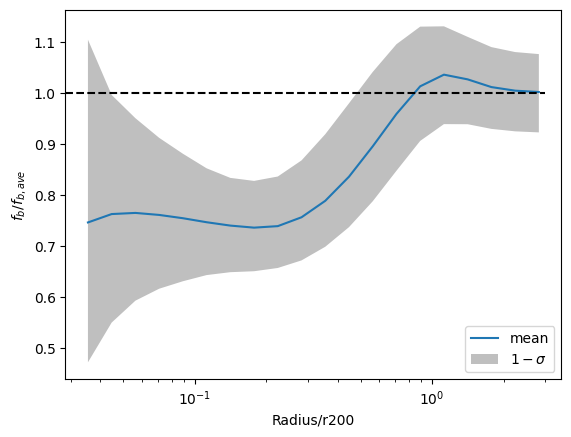

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/halos_ranked.hdf5", 'r')
r200=np.array(f['r200'])
r100=np.array(f['r100'])
r50=np.array(f['r50'])
id=np.array(f['id'])
mass=np.array(f['mass'])[id<=0]
f.close()

r200=r200[id<=0]
r100=r100[id<=0]
r50=r50[id<=0]
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/profile.hdf5", 'r')
dm=np.array(f['dm'])
g=np.array(f['g'])
s=np.array(f['s'])
bins=np.array(f['bins'])
f.close()


ratio=(g*8.56+s*6.174)/dm/45.2/(0.02222/0.7**2/0.316)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xscale('log')
#$ax.set_yscale('log')
#for i in tqdm(range(len(dm))):
#    ax.plot(bins, g[i]/dm[i])
average_ratio=np.mean(ratio, axis=0)

per=np.percentile(ratio, [16, 50, 84], axis=0)


    
ax.plot(bins, per[1], label='mean')

ax.fill_between(bins, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.legend()
ax.hlines(1,0,3,linestyles="dashed",colors='k')

ax.set_xlabel('Radius/r200')
ax.set_ylabel(r'$f_{b}$/$f_{b,ave}$')
plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/profile.png")

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_1843/1667871301.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  p=ax.scatter(r100[S_200<10]/r200[S_200<10],S[S_200<10],s=0.3,alpha=0.3,cmap="rainbow")
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_1843/1667871301.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0, 0.5, 'S100-S200')

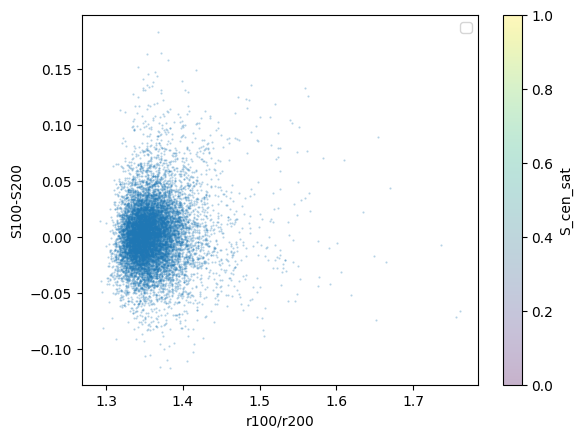

In [34]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S_compare.hdf5",'r')
S_c=np.array(f["S_central"])
S_m=np.array(f["S_central_sat"])
S_100=np.array(f["S_r100"])
S_200=np.array(f["S_r200"])
S_rm50=np.array(f["S_r50_m"])
S_rm=np.array(f["S_mem_r100"])
f.close()
fig=plt.figure()
ax=fig.add_subplot(111)
#ax.set_xscale('log')

S=S_100-S_200
    
p=ax.scatter(r100[S_200<10]/r200[S_200<10],S[S_200<10],s=0.3,alpha=0.3,cmap="rainbow")
b=plt.colorbar(p)
b.set_label("S_cen_sat")
ax.legend()


ax.set_xlabel('r100/r200')
ax.set_ylabel('S100-S200')
#plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/profile.png")


In [3]:
import numpy as np
import h5py
x=np.random.uniform(-1,1,size=10000)
y=np.random.uniform(-1,1,size=10000)
C1=np.array([x,y,np.zeros(len(x))]).T
C2=np.array([2*x,2*y,np.zeros(len(x))]).T
V1=np.ones(len(x))
V2=np.ones(len(x))*(-1)
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/test.hdf5",'w')
dm=f.create_group("PartType0")
dm.create_dataset("Coordinates",data=np.concatenate([C1,C2]))
dm.create_dataset("Velocities",data=np.concatenate([V1,V2]))
f.close()
